# Modelo reapertura CDMX
## Evaluar tolerancia de regreso

Considerando que regresan personas al espacio público, queremos saber que porcentaje de la población puede regresar a la actividad sin que se reactive la actividad epidémica

### Cargar paquetes

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import EoN
from matplotlib import rc
import scipy
import random
import pandas as pd
import numpy as np
from collections import defaultdict

# Leer redes nulas

- Red CDMX     - la red de la CDMX, obtenida de la encuesta origen destino
- Red "Susana" - Un subgrafo de la red CDMX con el 25% de los enlaces totales

In [3]:
g        = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_cdmx_infomap.graphml")) #red cdmx
g_susana = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_susana.graphml"))

## Condiciones iniciales el 2020-06-15

In [4]:
recuperados = 34834
infectados  = 10590

poblacion_real     = 9000000
poblacion_escalada = len(g.nodes())

recuperados_escalados = round(recuperados * poblacion_escalada / poblacion_real) 
infectados_escalados  = round(infectados * poblacion_escalada / poblacion_real) 

print(recuperados_escalados)
print(infectados_escalados)

infectados_totales  = round(100*infectados_escalados/10)
recuperados_totales = round(100*recuperados_escalados/10)

print(infectados_totales)
print(recuperados_totales)

28
8
80
280


## Supuestos: 

- Transmisión sobre la red de contactos de la CDMX 
- 350k personas se reincorporan



(eso lo hago en R porque me es más fácil)

In [3]:
# my_fractions = seq(5, 50, by=5)
# 
# lapply(X = my_fractions, FUN = function(i){
#   #randomly pick some nodes 
#   my_fracc = i/100
#   set.seed(725)
#   my_nodes = sample(x = V(g), size = length(V(g))*my_fracc, replace = F)
#   #get their ego graphs
#   my_nbs = make_ego_graph(g, order = 1, nodes = my_nodes) 
#   
#   #bind the ego graphs 
#   reac_g <-
#     my_nbs %>% 
#     lapply(FUN = function(i){get.data.frame(x = i, what = "edges")}) %>% 
#     bind_rows() %>% 
#     unique() %>% 
#     graph_from_data_frame(directed = F)
#   
#   #join with susana 
#   
#   jg = igraph::union(g_susana, reac_g)
#   
#   #writeout 
#   padded  = str_pad(string = i, width = 2, side = "left", pad = "0")
#   fileout = paste0("results/redes_eon/", "g_reactivate_", padded, "percent.graphml")
#   
#   write.graph(graph = jg, file = fileout, format = "graphml")
# })

### Leer reincorporacion 5, 25, y 50 para empezar

In [5]:
g_05 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reactivate_05percent.graphml"))
g_25 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reactivate_25percent.graphml"))
g_50 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reactivate_50percent.graphml"))

## Definir la dinámica epidémica

In [6]:
## transiciones

#g

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g.edges()} 



nx.set_node_attributes(g, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g, values=edge_attribute_dict, name='transmission_weight')

In [7]:
#g_susana

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_susana.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_susana.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_susana.edges()} 

nx.set_node_attributes(g_susana, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_susana, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_susana, values=edge_attribute_dict, name='transmission_weight')



In [9]:
#g_05

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_05.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_05.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_05.edges()} 

nx.set_node_attributes(g_05, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_05, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_05, values=edge_attribute_dict, name='transmission_weight')

#g_25

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_25.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_25.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_25.edges()} 

nx.set_node_attributes(g_25, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_25, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_25, values=edge_attribute_dict, name='transmission_weight')

#g_50

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_50.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_50.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_50.edges()} 

nx.set_node_attributes(g_50, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_50, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_50, values=edge_attribute_dict, name='transmission_weight')

In [102]:
### rates
ei_rate = 1/1.5 # so that minimum rate is 12 hours, maximum is 72
ir_rate = 1/(14) # so minimum time is 14 days, and maximum time is 28 days


#transmission_rate = 0.155 #old SEIRSplus
#transmission_rate = 0.030
#transmission_rate = 0.00125
#transmission_rate = 0.0025
#transmission_rate = 0.0040

#this represents the baseline transmission. Let's use the one we used with SEIRSplus
SIGMA  = 1/5.2
GAMMA  = 1/10
MU_I   = 0.002
R0     = 2.5
transmission_rate   = 1/(1/GAMMA) * R0

transmission_rate = 0.125
print(transmission_rate)

0.125


In [103]:
#the node intrinsic transitions
H = nx.DiGraph()
H.add_node('S') #This line is actually unnecessary since 'S' does not change status intrinsically
#
H.add_edge('E', 'I', rate = ei_rate, weight_label='expose2infect_weight')
#
H.add_edge('I', 'R', rate = ir_rate, weight_label ='infect2recove_weight')

#interaction depending transitions
J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'E'), rate = transmission_rate, weight_label='transmission_weight')
#  The line above states that an 'I' individual will cause an 'S' individual
#  to transition to 'E' with rate equal to 0.1 times the partnership's attribute
#  'transmission_weight'.


In [104]:
IC = defaultdict(lambda: 'S')
for node in range(infectados_totales-1):

    IC[node] = 'I'
    
for node in range(infectados_totales, recuperados_totales):
    
    IC[node] = 'R'
    
return_statuses = ('S', 'E', 'I', 'R')

# Modelo Nulo, Regresar a la normalidad absoluta

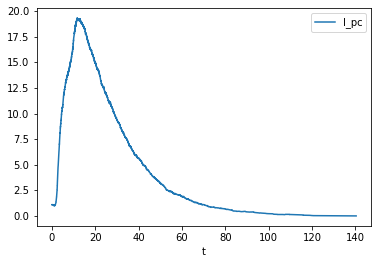

In [105]:
mod_nuloAbs = EoN.Gillespie_simple_contagion(G=g, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_nuloAbs

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]


df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/null_normalidad.csv")

df.plot(x="t", y="I_pc")

In [106]:


# probando = []

# for i in range(3):
    
#     #my_series = i*pd.Series(range(3))

#     mod_nuloAbs = EoN.Gillespie_simple_contagion(G=g, 
#                                                  spontaneous_transition_graph=H,
#                                                  nbr_induced_transition_graph=J, 
#                                                  IC=IC, 
#                                                  return_statuses=return_statuses,
#                                                  return_full_data=True,
#                                                  tmax=1000
#                                                  )
#     my_result = mod_nuloAbs

#     my_result.summary()[0]
   
#     predata = my_result.summary()[1]
#     predata["t"] = my_result.summary()[0]
#     df = pd.DataFrame(predata)
#     df = df.assign(I_pc=100*df['I']/poblacion_escalada)
    
#     probando.append(df)

# # df.to_csv("results/redes_eon/null_normalidad.csv")

# # df.plot(x="t", y="I_pc")

# probando = pd.concat(probando, axis=1, join='outer')
# print(probando)

# Modelo Nulo, preservar Susana Distancia

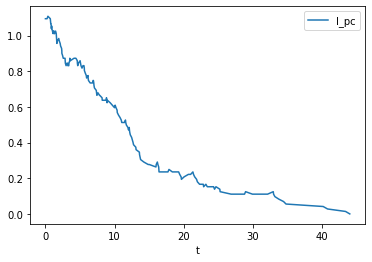

In [107]:
mod_susana = EoN.Gillespie_simple_contagion(G=g_susana, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_susana

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/null_susana.csv")

df.plot(x="t", y="I_pc")


# Escenario de regreso: 05% de la población

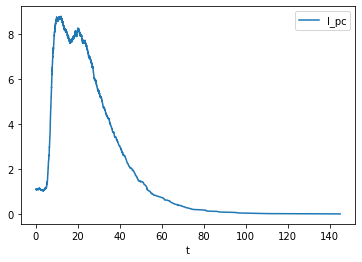

In [108]:
mod_reg05 = EoN.Gillespie_simple_contagion(G=g_05, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_reg05

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_05.csv")

df.plot(x="t", y="I_pc")

# Escenario de regreso:  25% de la población 

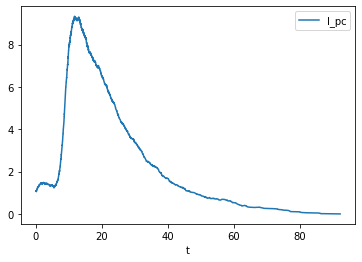

In [110]:
mod_reg25 = EoN.Gillespie_simple_contagion(G=g_25, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_reg25

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_25.csv")

df.plot(x="t", y="I_pc")

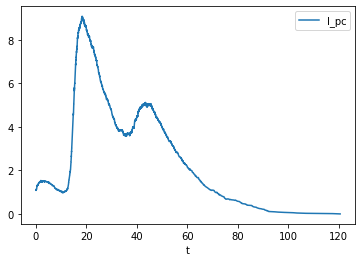

In [111]:
mod_reg50 = EoN.Gillespie_simple_contagion(G=g_50, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_reg50

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_50.csv")

df.plot(x="t", y="I_pc")

Lo que decíamos antes:

Podemos ver que con un 50% de personas que regresen al espacio público, el fenómeno epidémico se regresa practicamente al escenario de no medidas de mitigación

## Parece que este es el escenario que observamos en la vida real. 

# Exploremos el rango de 5 a 20

In [112]:
g_10 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reactivate_10percent.graphml"))
g_15 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reactivate_15percent.graphml"))
g_20 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reactivate_20percent.graphml"))


In [113]:
#g_10

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_10.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_10.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_10.edges()} 

nx.set_node_attributes(g_10, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_10, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_10, values=edge_attribute_dict, name='transmission_weight')

#g_15

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_15.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_15.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_15.edges()} 

nx.set_node_attributes(g_15, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_15, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_15, values=edge_attribute_dict, name='transmission_weight')

#g_20

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_20.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_20.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_20.edges()} 

nx.set_node_attributes(g_20, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_20, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_20, values=edge_attribute_dict, name='transmission_weight')

# Escenario de regreso: 10% población

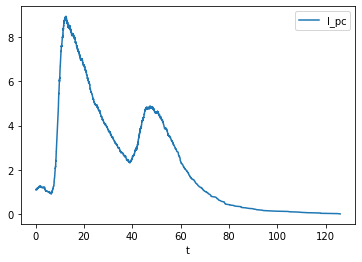

In [114]:
mod_reg10 = EoN.Gillespie_simple_contagion(G=g_10, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_reg10

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_10.csv")

df.plot(x="t", y="I_pc")

# Escenario 15%

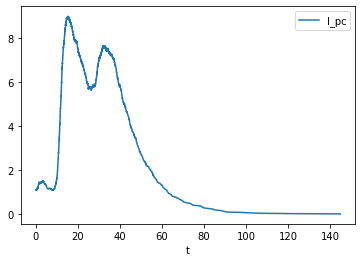

In [115]:
mod_reg15 = EoN.Gillespie_simple_contagion(G=g_15, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_reg15

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_15.csv")

df.plot(x="t", y="I_pc")

# Escenario 20%

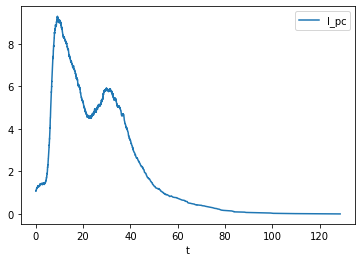

In [116]:
mod_reg20 = EoN.Gillespie_simple_contagion(G=g_20, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_reg20

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_20.csv")

df.plot(x="t", y="I_pc")

### Exploremos el intervalo de 5% a 10% para ver la tolerancia máxima de reactivación del brote epidémico

In [117]:
g_06 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reactivate_06percent.graphml"))
g_07 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reactivate_07percent.graphml"))
g_08 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reactivate_08percent.graphml"))
g_09 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reactivate_09percent.graphml"))


FileNotFoundError: [Errno 2] No such file or directory: 'results/redes_eon/g_reactivate_06percent.graphml'

In [118]:
#g_06

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_06.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_06.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_06.edges()} 

nx.set_node_attributes(g_06, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_06, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_06, values=edge_attribute_dict, name='transmission_weight')

#g_07

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_07.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_15.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_15.edges()} 

nx.set_node_attributes(g_07, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_07, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_07, values=edge_attribute_dict, name='transmission_weight')

#g_08

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_08.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_08.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_08.edges()} 

nx.set_node_attributes(g_08, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_08, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_08, values=edge_attribute_dict, name='transmission_weight')

#g_09

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_09.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_09.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_09.edges()} 

nx.set_node_attributes(g_09, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_09, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_09, values=edge_attribute_dict, name='transmission_weight')

NameError: name 'g_06' is not defined

# Escenario 06%

In [47]:
mod_reg06 = EoN.Gillespie_simple_contagion(G=g_06, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_reg06

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_06.csv")

df.plot(x="t", y="I_pc")

NameError: name 'g_06' is not defined

# Escenario 7 % 

In [48]:
mod_reg07 = EoN.Gillespie_simple_contagion(G=g_07, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_reg07

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_07.csv")

df.plot(x="t", y="I_pc")

NameError: name 'g_07' is not defined

# Escenario 8%

In [49]:
mod_reg08 = EoN.Gillespie_simple_contagion(G=g_08, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_reg08

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_08.csv")

df.plot(x="t", y="I_pc")

NameError: name 'g_08' is not defined

# Escenario 9%

In [50]:
mod_reg09 = EoN.Gillespie_simple_contagion(G=g_09, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_reg09

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_09.csv")

df.plot(x="t", y="I_pc")

NameError: name 'g_09' is not defined

# Escenarios Modulares

Haciendo el supuesto muy fuerte de que las personas que regresan al espacio público 

A) pertenecen a un único gran módulo 
B) pertenecen a varios módulos


In [51]:
g_m1 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reapertura_m1.graphml"))
g_m2 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reapertura_m2.graphml"))


In [119]:
#g_m1

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_m1.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_m1.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_m1.edges()} 

nx.set_node_attributes(g_m1, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_m1, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_m1, values=edge_attribute_dict, name='transmission_weight')

#g_m2

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_m2.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_m2.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_m2.edges()} 

nx.set_node_attributes(g_m2, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_m2, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_m2, values=edge_attribute_dict, name='transmission_weight')

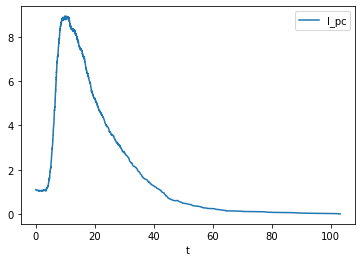

In [120]:
mod_m1 = EoN.Gillespie_simple_contagion(G=g_m1, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_m1

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_m1.csv")

df.plot(x="t", y="I_pc")

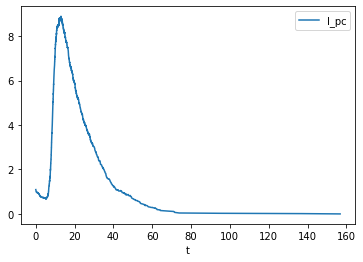

In [121]:
mod_m2 = EoN.Gillespie_simple_contagion(G=g_m2, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_m2

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_m2.csv")

df.plot(x="t", y="I_pc")

# Regreso modular, doble de población

In [122]:
g_m3 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reapertura_m3.graphml"))


In [123]:
#g_m3

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_m3.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_m3.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_m3.edges()} 

nx.set_node_attributes(g_m3, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_m3, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_m3, values=edge_attribute_dict, name='transmission_weight')


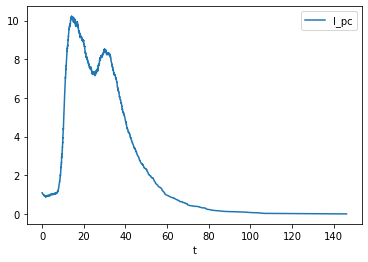

In [124]:
mod_m3 = EoN.Gillespie_simple_contagion(G=g_m3, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_m3

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_m3.csv")

df.plot(x="t", y="I_pc")

# Regreso modular, triple de población

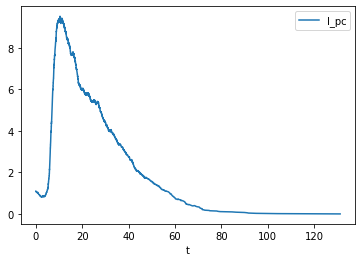

In [125]:
g_m4 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reapertura_m4.graphml"))

#g_m4

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_m4.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_m4.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_m4.edges()} 

nx.set_node_attributes(g_m4, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_m4, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_m4, values=edge_attribute_dict, name='transmission_weight')

mod_m4 = EoN.Gillespie_simple_contagion(G=g_m4, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_m4

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_m4.csv")

df.plot(x="t", y="I_pc")

# 20% de población, en módulos

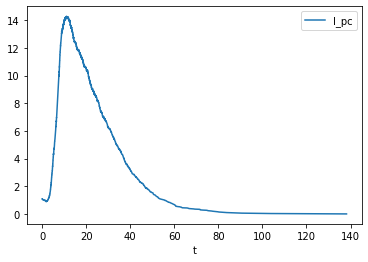

In [126]:
g_m5 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reapertura_m5.graphml"))

#g_m5

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_m5.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_m5.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_m5.edges()} 

nx.set_node_attributes(g_m5, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_m5, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_m5, values=edge_attribute_dict, name='transmission_weight')

mod_m5 = EoN.Gillespie_simple_contagion(G=g_m5, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_m5

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_m5.csv")
df.plot(x="t", y="I_pc")

# 17.5 % poblacion 

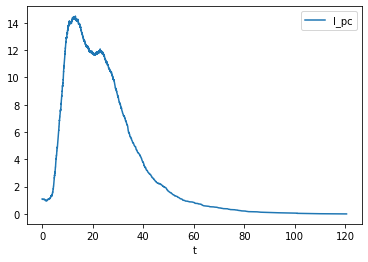

In [127]:
g_m6 = nx.convert_node_labels_to_integers(nx.read_graphml("results/redes_eon/g_reapertura_m6.graphml"))

#g_m6

#Stochastic transition E-I 
ei_node_attribute = {node: random.uniform(a=0.5, b=2) for node in g_m6.nodes()}
#Stochastic transition I-R 
#will multiply recovery rate for some factor so it is between 14 and 28 days 
ir_node_attribute = {node: random.randint(a=1, b=2) for node in g_m6.nodes()}
#Transmission weight - varies for each pair of interactions (some contacts are very transmisive, others not so)
edge_attribute_dict = {edge: 0.5+random.random() for edge in g_m6.edges()} 

nx.set_node_attributes(g_m6, values=ei_node_attribute, name='expose2infect_weight')
nx.set_node_attributes(g_m6, values=ir_node_attribute, name='infect2recove_weight')
nx.set_edge_attributes(g_m6, values=edge_attribute_dict, name='transmission_weight')

mod_m6 = EoN.Gillespie_simple_contagion(G=g_m6, 
                                            spontaneous_transition_graph=H,
                                            nbr_induced_transition_graph=J, 
                                            IC=IC, 
                                            return_statuses=return_statuses,
                                            return_full_data=True,
                                            tmax=1000
                                            )
my_result = mod_m6

my_result.summary()[0]

predata = my_result.summary()[1]
predata["t"] = my_result.summary()[0]

df = pd.DataFrame(predata)
df = df.assign(I_pc=100*df['I']/poblacion_escalada)

df.to_csv("results/redes_eon/mod_m6.csv")
df.plot(x="t", y="I_pc")